In [2]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from plotnine import *

In [3]:
dataset = Dataset('data/ERsst.mnmean.nc')
data = np.array(dataset.variables['sst'][:])
data.shape

(1973, 89, 180)

In [4]:
def get_sst_from_pos(pos_x, pos_y):
    sst_df = pd.DataFrame(data[:, 89-pos_y, 180-pos_x], columns=['sst'])
    time_array = np.linspace(1854, 2018, len(sst_df))
    sst_df = pd.concat([sst_df, pd.DataFrame(time_array, columns=['time'])], axis=1)
    return sst_df

In [154]:
pos_dict = {
    'South Pacific': (10, 52),
    'North Atlantic': (70, 22),
    'the North Sea': (92, 15),
    'Japan Sea': (159, 24),
    'the Southern Indian Ocean': (129, 49),
    'Mediterranean': (99, 26)
}

In [190]:
def cal_mean_rise_sst(region_dict):
    mean_dict = {}
    for region in region_dict:
        df = get_sst_from_pos(region_dict[region][0], region_dict[region][1])
        array = np.array(df[df['time']>1950]['sst'])
        mean_dict[region] = array[-12:].mean() - array[:12].mean()
    return mean_dict

cal_mean_rise_sst(pos_dict)

{'South Pacific': 0.4090538,
 'North Atlantic': 1.3255758,
 'the North Sea': 0.48096037,
 'Japan Sea': -0.788064,
 'the Southern Indian Ocean': 0.9554577,
 'Mediterranean': 1.0136356}

In [178]:
get_sst_from_pos(10 , 52)['sst'][:-10].mean() - get_sst_from_pos(10, 52)['sst'][:10].mean()

0.68053627

In [176]:
def save_sst_plot_from_dict(region_dict):
    df_list = []
    for region in region_dict:
        df = get_sst_from_pos(region_dict[region][0], region_dict[region][1])
        df['region'] = region
        df_list.append(df)

    df = pd.concat(df_list)

    (
        ggplot(df[df['time']>1950], aes('time', 'sst', color='sst'))
        + geom_line()
        + geom_smooth(size=.1)
        + facet_wrap('region', ncol=3, scales='free')
        + labs(x='Year',
               y='Sea Surface Temperature (SST), [Celsius]',
               title='Global Sea Surface Temperature Change',
               color='SST')
    ).save('img/sst/global sea surface temperature change.png')

save_sst_plot_from_dict(pos_dict)

c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/sst/global sea surface temperature change.png
c:\environment\python3.8.5\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


In [191]:
def save_sst_plot_with_begin_time(name, pos_x, pos_y, begin_time_list):
    df_list = []
    for begin_time in begin_time_list:
        df = get_sst_from_pos(pos_x, pos_y)
        df = df[df['time']>begin_time]
        df['begin_time'] = begin_time
        df_list.append(df)

    df = pd.concat(df_list)

    (
        ggplot(df, aes('time', 'sst', color='sst'))
        + geom_line()
        + geom_smooth(size=.1)
        + facet_wrap('begin_time', scales='free')
        + labs(x='Year',
               y='Sea Surface Temperature (SST), [Celsius]',
               title='Sea Surface Temperature Change of {}'.format(name),
               color='SST')
    ).save('img/sst/sea surface temperature change of {}'.format(name))

save_sst_plot_with_begin_time('Scotland', 88, 17, [1900, 1960, 1998, 2013])

c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/sst/sea surface temperature change of Scotland
c:\environment\python3.8.5\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


In [211]:
sst_df = get_sst_from_pos(88, 17)
sst_df.to_csv('data/sst_of_scotland.csv', index=None)
sst_array = np.array(sst_df['sst'])
sst_array

array([7.954714 , 8.199177 , 7.6553307, ..., 7.7854586, 7.357517 ,
       6.598882 ], dtype=float32)

In [10]:
df_list = []
for i in range(0, 360, 30):
    df_temp = pd.DataFrame(data[i, 89-19:89-14, 180-78], columns=['sst'])
    df_temp['lat'] = np.linspace(50, 60, len(df_temp))
    df_temp['time'] = int(i/30 + 1)
    df_list.append(df_temp)

df_lat = pd.concat(df_list)
df_lat

,sst,lat,time
0,10.876610,50.0,1
1,9.052114,52.5,1
2,6.817993,55.0,1
3,4.645128,57.5,1
4,2.937850,60.0,1
0,7.339019,50.0,2
1,5.593047,52.5,2
2,3.680765,55.0,2
3,1.894276,57.5,2
4,0.561389,60.0,2


In [20]:
df_lat_group = df_lat.groupby('lat').mean().reset_index()
df_lat_group = df_lat_group.drop(['time'], axis=1)
df_lat_group

,lat,sst
0,50.0,8.582156
1,52.5,6.782746
2,55.0,4.752162
3,57.5,2.828192
4,60.0,1.369885


In [24]:
np.polyfit(df_lat_group['sst'], df_lat_group['lat'], 1)

array([-1.3565058, 61.5967259])

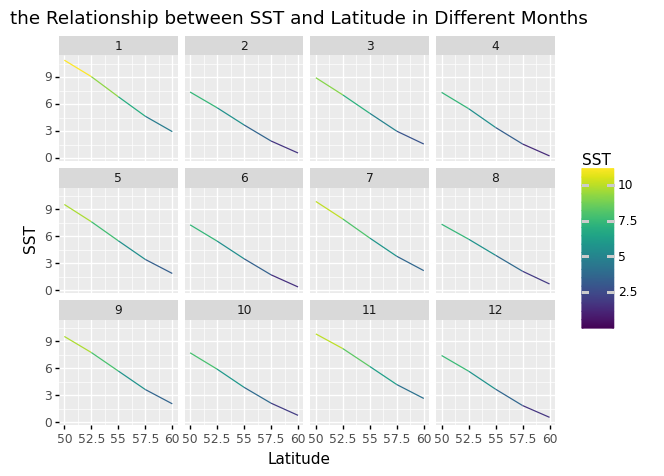

<ggplot: (142828562240)>

In [25]:
(
    ggplot(df_lat, aes('lat', 'sst', color='sst'))
    + geom_line()
    + facet_wrap('time')
    + labs(x='Latitude',
           y='SST',
           title='the Relationship between SST and Latitude in Different Months',
           color='SST')
).save('img/sst/the relationship between sst and latitude in different months.png')
